---

In [91]:
# Install necessary libraries if needed

In [92]:
!pip install pandas numpy matplotlib seaborn lightgbm scikit-learn  # Install essential libraries for data manipulation, visualization, and modeling


---

---

In [93]:
# Import warnings to manage any warning messages

In [94]:
import warnings  # For handling warning messages in Python

In [95]:
warnings.filterwarnings('ignore')  # This will suppress all warnings for a cleaner output

---

---

In [96]:
# Import libraries

In [97]:
import pandas as pd  # For data manipulation and analysis

In [98]:
import numpy as np  # For numerical operations

In [99]:
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

In [100]:
import seaborn as sns  # For statistical data visualization

In [101]:
import lightgbm as lgb  # For LightGBM model implementation

In [102]:
from sklearn.model_selection import train_test_split  # For splitting data into training and validation sets


In [103]:
from sklearn.metrics import accuracy_score, f1_score  # For evaluating model performance

In [104]:
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [105]:
import missingno as msno  # For missing values visualization

---

---

In [106]:
# Load the datasets

In [107]:
train_df = pd.read_csv('/content/train.csv')  # Load the training dataset

In [108]:
test_df = pd.read_csv('/content/test.csv')  # Load the test dataset

In [109]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')  # Load the sample submission dataset


---

---

# EXPLANATORY DATA ANALYSIS

In [110]:
# Display the first few rows of the datasets
print("Training Dataset:")  # Print a header for the training dataset
print(train_df.head(), "\n")  # Display the first few rows of the training dataset

Training Dataset:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     0.

In [111]:
print("Test Dataset:")  # Print a header for the test dataset
print(test_df.head(), "\n")  # Display the first few rows of the test dataset

Test Dataset:
   row_id   timestamp    open    high     low   close    volume  \
0       0  1652817480  0.4306  0.4308  0.4301  0.4301  101150.0   
1       1  1652817540  0.4301  0.4303  0.4293  0.4302  275647.0   
2       2  1652817600  0.4302  0.4302  0.4292  0.4299  134959.0   
3       3  1652817660  0.4299  0.4303  0.4299  0.4301  316209.0   
4       4  1652817720  0.4302  0.4307  0.4302  0.4303  107440.0   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          43542.2629             105.0                46109.0   
1         118478.9689             228.0                91260.0   
2          57979.2418             156.0                56685.0   
3         135979.4040             121.0               161740.0   
4          46243.7993             113.0                31096.0   

   taker_buy_quote_volume  
0              19851.7237  
1              39217.6312  
2              24357.5448  
3              69552.2691  
4              13384.3384   



In [112]:
print("Sample Submission Dataset:")  # Print a header for the sample submission dataset
print(sample_submission_df.head(), "\n")  # Display the first few rows of the sample submission dataset


Sample Submission Dataset:
   row_id  target
0       0       0
1       1       0
2       2       1
3       3       1
4       4       1 



In [113]:
# Inspect the shape of the datasets

In [114]:
print("Training Dataset Shape:", train_df.shape)  # Print the shape of the training dataset

Training Dataset Shape: (1882366, 11)


In [115]:
print("Test Dataset Shape:", test_df.shape)  # Print the shape of the test dataset

Test Dataset Shape: (909617, 11)


In [116]:
print("Sample Submission Shape:", sample_submission_df.shape)  # Print the shape of the sample submission dataset


Sample Submission Shape: (50, 2)


In [117]:
# Check for missing values and handle them if necessary

In [118]:
print("Missing values in training dataset:\n", train_df.isnull().sum())  # Display the count of missing values for each column


Missing values in training dataset:
 timestamp                 0
open                      0
high                      0
low                       1
close                     1
volume                    1
quote_asset_volume        1
number_of_trades          1
taker_buy_base_volume     1
taker_buy_quote_volume    1
target                    1
dtype: int64


In [119]:
train_df.dropna(subset=['target'], inplace=True)  # Drop rows in training dataset where 'target' is missing


In [120]:
# Inspect the data types of the columns

In [121]:
print("Data Types in Training Dataset:\n", train_df.dtypes)  # Display data types of columns in the training dataset


Data Types in Training Dataset:
 timestamp                   int64
open                      float64
high                      float64
low                       float64
close                     float64
volume                    float64
quote_asset_volume        float64
number_of_trades          float64
taker_buy_base_volume     float64
taker_buy_quote_volume    float64
target                    float64
dtype: object


In [179]:
# Check for duplicates

In [180]:
print(f"Number of duplicate rows in the training dataset: {train_df.duplicated().sum()}")  # Check for duplicate rows in the training dataset
print(f"Number of duplicate rows in the test dataset: {test_df.duplicated().sum()}")  # Check for duplicate rows in the test dataset


Number of duplicate rows in the training dataset: 0
Number of duplicate rows in the test dataset: 0


In [183]:
# Drop duplicates if necessary(N/A here since no dup)

In [182]:
# train_df.drop_duplicates(inplace=True)  # Remove duplicate rows from the training set

In [122]:
# EDA: Visualize distributions of features

In [123]:
features = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
            'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume']  # List of features to be used for modeling


<Figure size 1200x800 with 0 Axes>

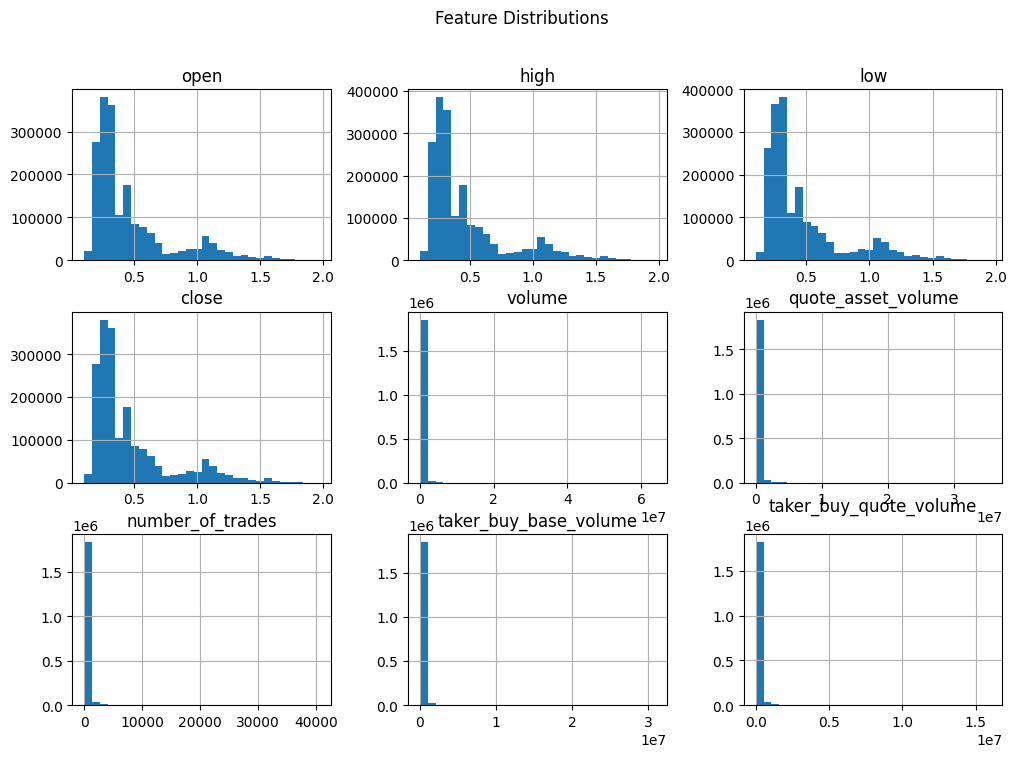

In [124]:
plt.figure(figsize=(12, 8))  # Set the figure size for histograms
train_df[features].hist(bins=30, figsize=(12, 8), layout=(3, 3))  # Plot histograms for each feature
plt.suptitle('Feature Distributions')  # Add a title for the histogram plot
plt.show()  # Display the histograms

In [125]:
# EDA: Correlation matrix

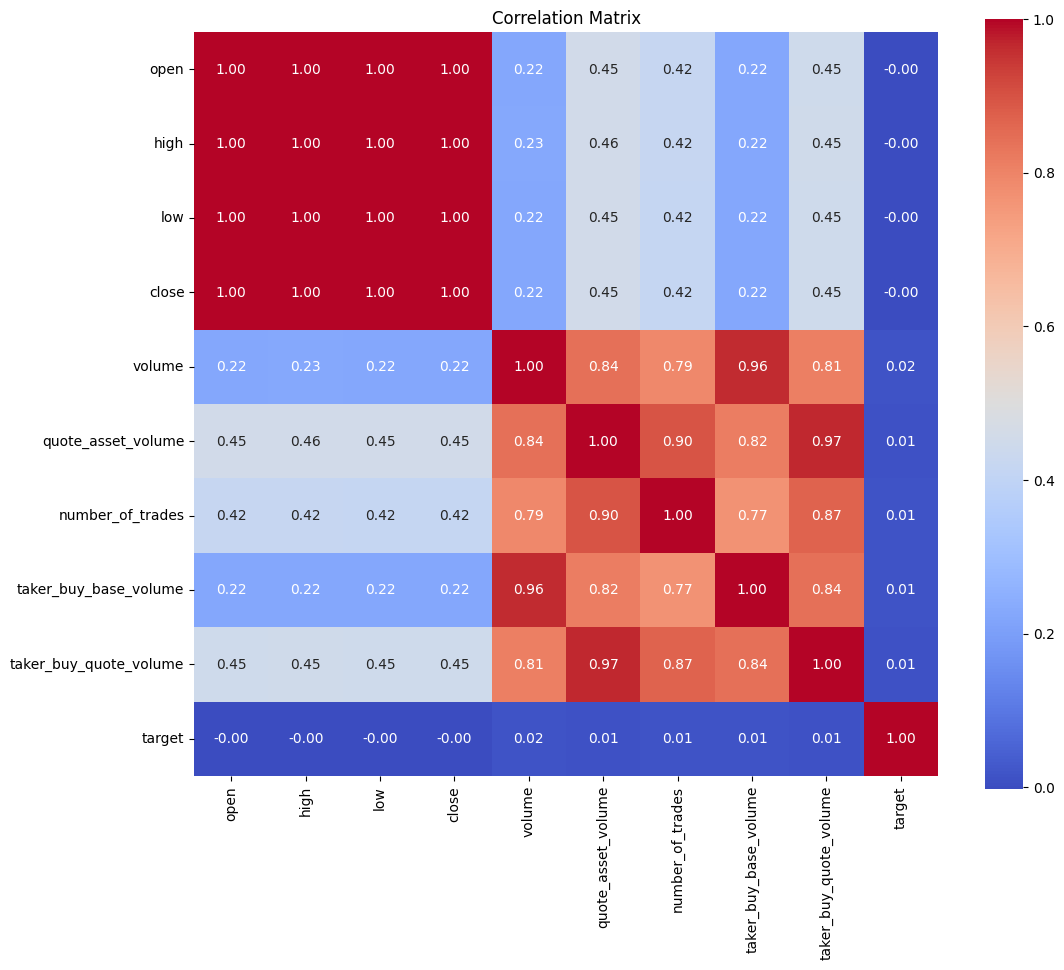

In [126]:
plt.figure(figsize=(12, 10))  # Set the figure size for the correlation matrix
correlation_matrix = train_df[features + ['target']].corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)  # Plot the heatmap for correlation matrix
plt.title('Correlation Matrix')  # Add a title for the heatmap
plt.show()  # Display the correlation matrix

In [127]:
# EDA: Scatter plots for features against the target

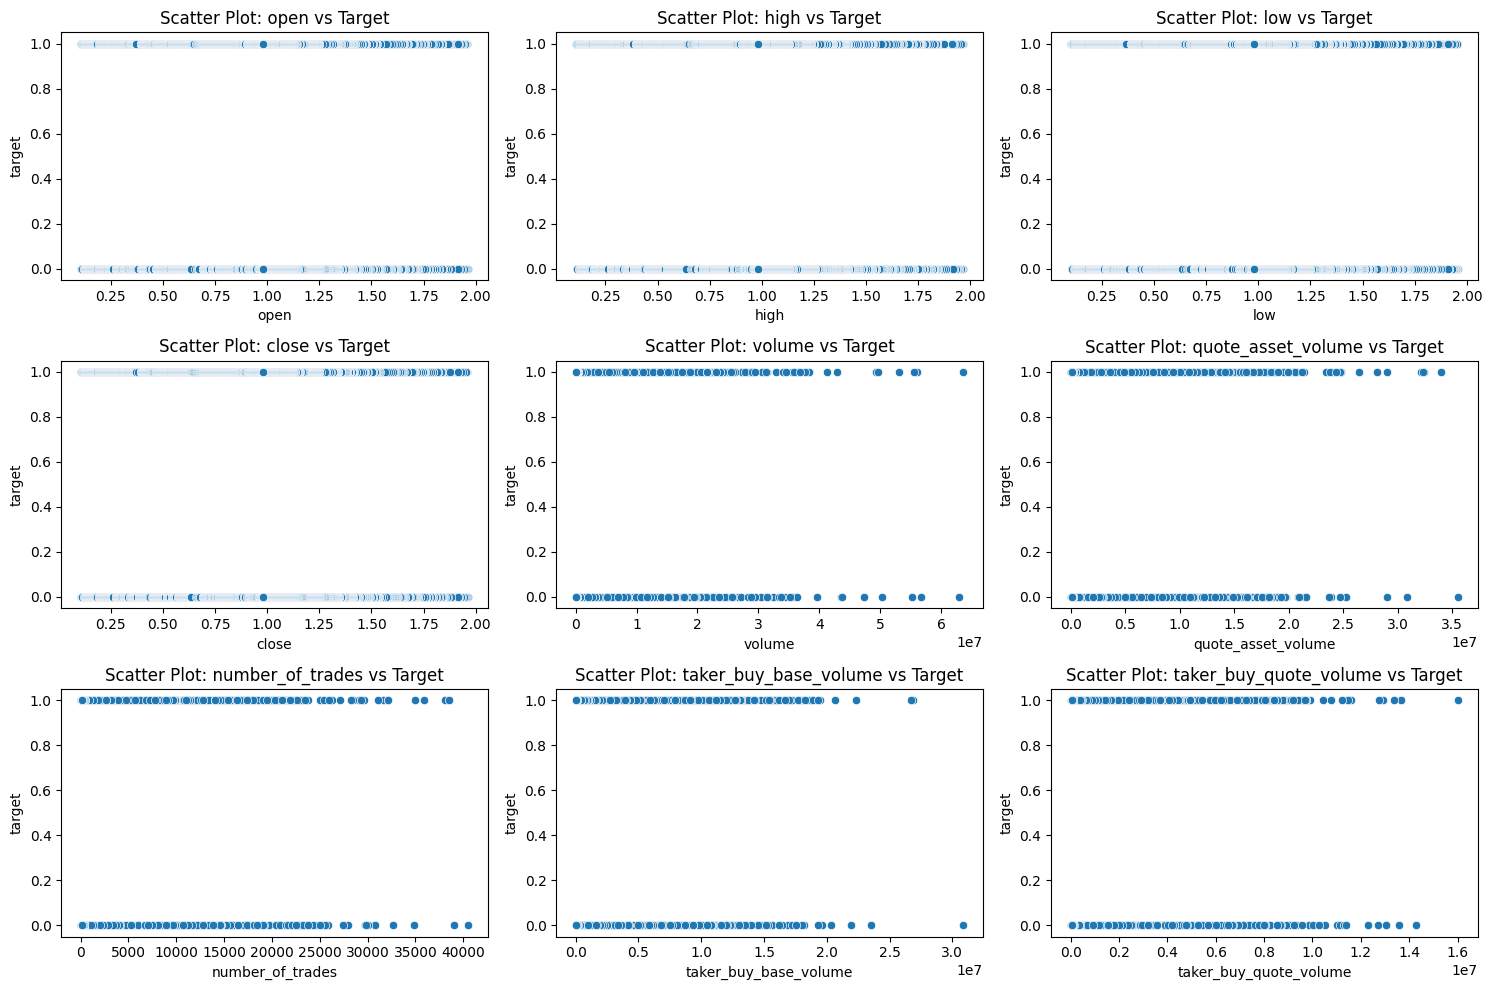

In [128]:
plt.figure(figsize=(15, 10))  # Set the figure size for scatter plots
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each feature
    sns.scatterplot(data=train_df, x=feature, y='target')  # Plot scatter plot for the feature against target
    plt.title(f'Scatter Plot: {feature} vs Target')  # Add title for the scatter plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the scatter plots

---

In [184]:
# Outlier detection using Z-score method

In [185]:
# from scipy import stats  # Import statistical functions

In [186]:
# # Define a threshold for Z-score

In [187]:
# z_threshold = 3  # Set threshold for identifying outliers (Z-score > 3)

In [188]:
# # Calculate the Z-score for each numerical feature

In [189]:
# z_scores = np.abs(stats.zscore(train_df[features]))  # Calculate Z-scores for numerical features in training set


In [190]:
 # Identify rows that are outliers (based on the threshold)

In [191]:
#outliers = (z_scores > z_threshold).any(axis=1)  # Identify rows with any feature having Z-score beyond the threshold


In [192]:
# print(f"Number of outliers detected: {outliers.sum()}")  # Print the number of detected outliers

In [193]:
# Optionally, drop the outliers

In [194]:
# train_df = train_df[~outliers]  # Remove outlier rows from the training set

In [195]:
# # Encoding categorical variables (if any)

In [196]:
# Example: using One-Hot Encoding for categorical variables

In [198]:
#categorical_features = ['column_name1', 'column_name2']  # Replace with actual categorical column names


In [199]:
# Perform one-hot encoding

In [200]:
# train_df = pd.get_dummies(train_df, columns=categorical_features)  # Apply One-Hot Encoding to the training dataset


In [201]:
# test_df = pd.get_dummies(test_df, columns=categorical_features)  # Apply One-Hot Encoding to the test dataset


In [202]:
# Align the columns of the test set with the training set (in case test has fewer categories)

In [203]:
# test_df = test_df.reindex(columns=train_df.columns, fill_value=0)  # Align columns by reindexing the test dataset to match training columns


In [129]:
# Feature selection

In [130]:
X = train_df[features]  # Features data from the training dataset

In [131]:
y = train_df['target']  # Target variable from the training dataset

In [132]:
# Use a small subset of the training data for fast execution

In [133]:
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=0.01, random_state=42)  # Randomly select 1% of the data for faster training


In [134]:
# Train-Test Split

In [135]:
X_train, X_valid, y_train, y_valid = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)  # Split the subset into training and validation sets


In [136]:
# Scale the features

In [137]:
scaler = StandardScaler()  # Initialize the StandardScaler

In [138]:
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

In [139]:
X_valid_scaled = scaler.transform(X_valid)  # Transform the validation data

In [204]:
# Display the first few rows after preprocessing

In [205]:
print("Training dataset after handling missing values, duplicates, outliers, and encoding:\n", train_df.head())  # Show first few rows of the preprocessed training dataset


Training dataset after handling missing values, duplicates, outliers, and encoding:
     timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3

In [206]:
print("Test dataset after handling missing values, duplicates, outliers, and encoding:\n", test_df.head())  # Show first few rows of the preprocessed test dataset


Test dataset after handling missing values, duplicates, outliers, and encoding:
    row_id   timestamp    open    high     low   close    volume  \
0       0  1652817480  0.4306  0.4308  0.4301  0.4301  101150.0   
1       1  1652817540  0.4301  0.4303  0.4293  0.4302  275647.0   
2       2  1652817600  0.4302  0.4302  0.4292  0.4299  134959.0   
3       3  1652817660  0.4299  0.4303  0.4299  0.4301  316209.0   
4       4  1652817720  0.4302  0.4307  0.4302  0.4303  107440.0   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          43542.2629             105.0                46109.0   
1         118478.9689             228.0                91260.0   
2          57979.2418             156.0                56685.0   
3         135979.4040             121.0               161740.0   
4          46243.7993             113.0                31096.0   

   taker_buy_quote_volume  
0              19851.7237  
1              39217.6312  
2              24357.5448  
3      

---

---

In [140]:
# Create LightGBM Dataset

In [141]:
train_data = lgb.Dataset(X_train_scaled, label=y_train)  # Create LightGBM dataset for training

In [142]:
valid_data = lgb.Dataset(X_valid_scaled, label=y_valid)  # Create LightGBM dataset for validation

In [143]:
# Set model parameters

In [144]:
params = {  # Define model parameters
    'objective': 'binary',  # Set objective to binary classification
    'metric': 'binary_logloss',  # Set metric for validation
    'boosting_type': 'gbdt',  # Set boosting type to Gradient Boosting Decision Tree
    'learning_rate': 0.1,  # Set learning rate for model training
    'num_leaves': 31,  # Set maximum number of leaves in one tree
    'max_depth': -1,  # No limit on tree depth
    'verbose': -1,  # Suppress output messages
}

---

---

In [145]:
# Train the model

In [146]:
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=100)  # Train the LightGBM model


---

---

In [147]:
# Validate the model

In [148]:
y_pred_valid = model.predict(X_valid_scaled)  # Generate predictions for the validation set

In [149]:
y_pred_valid_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_valid]  # Convert probabilities to binary predictions


In [150]:
accuracy = accuracy_score(y_valid, y_pred_valid_binary)  # Calculate accuracy of the model

In [151]:
print(f"Validation Accuracy: {accuracy:.4f}")  # Print the validation accuracy

Validation Accuracy: 0.5116


In [152]:
# Calculate F1 Score

In [153]:
f1 = f1_score(y_valid, y_pred_valid_binary, average='weighted')  # Calculate weighted F1 score for validation predictions


In [154]:
print("F1 Score:", f1)  # Print the F1 score

F1 Score: 0.5094124711112961


---

---

In [155]:
# Visualizations for model output

In [156]:
# 1. Predicted vs Actual Scatter Plot

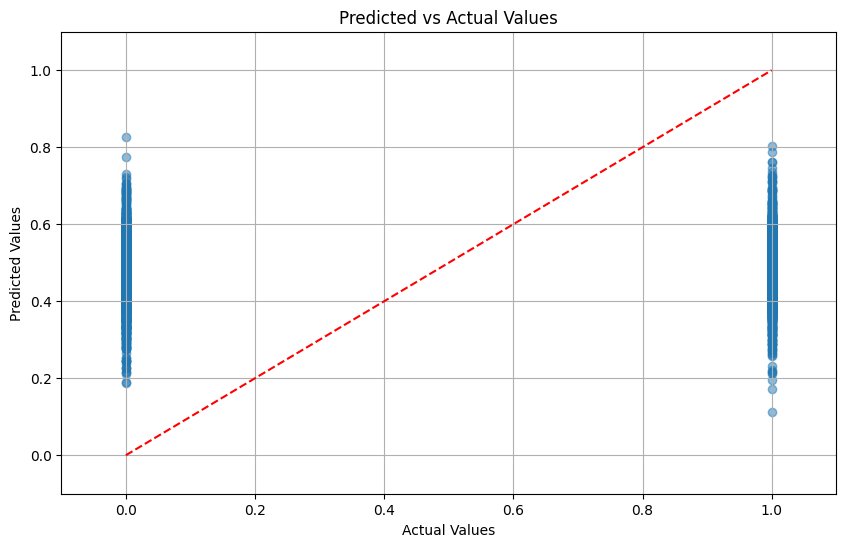

In [157]:
plt.figure(figsize=(10, 6))  # Set figure size for scatter plot
plt.scatter(y_valid, y_pred_valid, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Predicted vs Actual Values')  # Title for the scatter plot
plt.xlabel('Actual Values')  # Label for x-axis
plt.ylabel('Predicted Values')  # Label for y-axis
plt.xlim(-0.1, 1.1)  # Set limits for x-axis
plt.ylim(-0.1, 1.1)  # Set limits for y-axis
plt.grid()  # Show grid
plt.show()  # Display the scatter plot

In [158]:
# 2. Distribution of Predictions

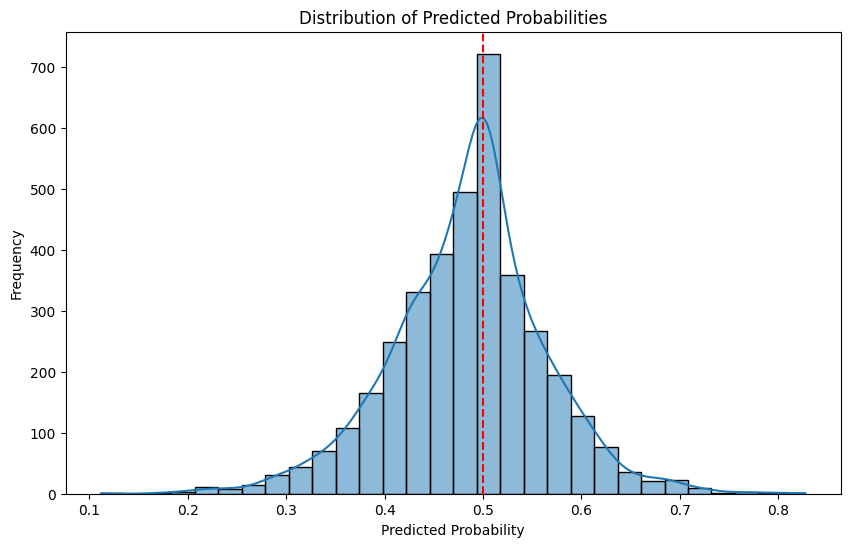

In [159]:
plt.figure(figsize=(10, 6))  # Set figure size for the distribution plot
sns.histplot(y_pred_valid, bins=30, kde=True)  # Plot the distribution of predicted probabilities
plt.title('Distribution of Predicted Probabilities')  # Title for the distribution plot
plt.xlabel('Predicted Probability')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.axvline(x=0.5, color='red', linestyle='--')  # Add a line for the threshold
plt.show()  # Display the distribution plot

In [160]:
# 3. Feature Importance Plot

<Figure size 1000x600 with 0 Axes>

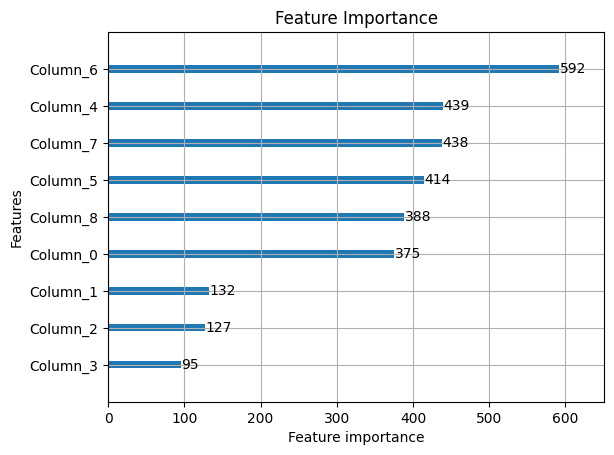

In [161]:
plt.figure(figsize=(10, 6))  # Set figure size for feature importance plot
lgb.plot_importance(model, max_num_features=10, importance_type='split', title='Feature Importance')  # Plot feature importance
plt.show()  # Display the feature importance plot

---

---

In [162]:
# Prepare the test dataset and generate predictions

In [163]:
X_test = test_df[features]  # Prepare the test dataset features

In [164]:
X_test_scaled = scaler.transform(X_test)  # Scale the test dataset

In [165]:
test_predictions = model.predict(X_test_scaled)  # Generate predictions for the test set

In [166]:
test_predictions_binary = [1 if pred >= 0.5 else 0 for pred in test_predictions]  # Convert probabilities to binary predictions


---

---

In [167]:
# Prepare submission DataFrame

In [173]:
submission_df = pd.DataFrame({  # Create a submission DataFrame
    'row_id': test_df['row_id'].values,  # Include row_id if necessary
    'target': test_predictions_binary  # This should match the shape of row_id
})

In [174]:
# Inspect the shape of the submission DataFrame

In [175]:
print("Submission DataFrame shape:", submission_df.shape)  # Print the shape (rows, columns)

Submission DataFrame shape: (909617, 2)


---

---

In [176]:
# Save the submission file

In [177]:
submission_df.to_csv('submission.csv', index=False)  # Save the submission DataFrame as a CSV file

In [171]:
print("Submission file saved as 'submission.csv'.")  # Confirm that the submission file was saved

Submission file saved as 'submission.csv'.


---